In [1]:
import pandas as pd
#from transformers import pipeline
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import matplotlib.pyplot as plt
import seaborn as sns
#nltk.download('all')

In [2]:
Data = pd.read_csv('C:/Users/alvar/Documents/Maestria en Ciencia de datos/Procesamiento y clasificación de datos/Tarea 2/events.csv')
Data

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,...,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break
0,UFot0hit/,UFot0hit1,1,2,Attempt missed. Mladen Petric (Hamburg) left f...,1,12.0,2,Hamburg SV,Borussia Dortmund,...,NaN,NaN,6.0,2.0,0,9.0,2.0,1,1.0,0
1,UFot0hit/,UFot0hit2,2,4,"Corner, Borussia Dortmund. Conceded by Dennis...",2,NaN,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
2,UFot0hit/,UFot0hit3,3,4,"Corner, Borussia Dortmund. Conceded by Heiko ...",2,NaN,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
3,UFot0hit/,UFot0hit4,4,7,Foul by Sven Bender (Borussia Dortmund).,3,NaN,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
4,UFot0hit/,UFot0hit5,5,7,Gokhan Tore (Hamburg) wins a free kick in the ...,8,NaN,2,Hamburg SV,Borussia Dortmund,...,NaN,NaN,NaN,NaN,0,2.0,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941004,z5L2OT5E/,z5L2OT5E123,123,92,Lucas Torreira (Sampdoria) wins a free kick in...,8,NaN,2,Sampdoria,Atalanta,...,NaN,NaN,NaN,NaN,0,2.0,NaN,0,NaN,0
941005,z5L2OT5E/,z5L2OT5E124,124,93,"Corner, Sampdoria. Conceded by Andrea Masiello.",2,NaN,2,Sampdoria,Atalanta,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
941006,z5L2OT5E/,z5L2OT5E125,125,93,Attempt missed. Fabio Quagliarella (Sampdoria)...,1,12.0,2,Sampdoria,Atalanta,...,NaN,NaN,8.0,2.0,0,9.0,1.0,1,3.0,0
941007,z5L2OT5E/,z5L2OT5E126,126,94,Alberto Grassi (Atalanta) wins a free kick on ...,8,NaN,1,Atalanta,Sampdoria,...,NaN,NaN,NaN,NaN,0,4.0,NaN,0,NaN,0


In [3]:
intentos = Data[Data['event_type'] == 1]
intentos

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,...,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break
0,UFot0hit/,UFot0hit1,1,2,Attempt missed. Mladen Petric (Hamburg) left f...,1,12.0,2,Hamburg SV,Borussia Dortmund,...,NaN,NaN,6.0,2.0,0,9.0,2.0,1,1.0,0
11,UFot0hit/,UFot0hit12,12,14,Attempt missed. Shinji Kagawa (Borussia Dortmu...,1,12.0,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,13.0,2.0,0,15.0,1.0,1,1.0,0
13,UFot0hit/,UFot0hit14,14,17,"Goal! Borussia Dortmund 1, Hamburg 0. Kevin G...",1,12.0,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,4.0,1.0,1,9.0,2.0,1,1.0,0
14,UFot0hit/,UFot0hit15,15,19,Attempt blocked. Mats Hummels (Borussia Dortmu...,1,NaN,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,2.0,3.0,0,15.0,1.0,0,1.0,0
17,UFot0hit/,UFot0hit18,18,20,Attempt blocked. Tomas Rincon (Hamburg) right ...,1,NaN,2,Hamburg SV,Borussia Dortmund,...,NaN,NaN,2.0,3.0,0,15.0,1.0,0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940983,z5L2OT5E/,z5L2OT5E102,102,81,Attempt blocked. Remo Freuler (Atalanta) right...,1,NaN,1,Atalanta,Sampdoria,...,NaN,NaN,2.0,3.0,0,15.0,1.0,0,1.0,0
940991,z5L2OT5E/,z5L2OT5E110,110,84,Attempt missed. Alberto Grassi (Atalanta) righ...,1,12.0,1,Atalanta,Sampdoria,...,NaN,NaN,10.0,2.0,0,15.0,1.0,1,1.0,0
940992,z5L2OT5E/,z5L2OT5E111,111,86,Attempt saved. Alejandro Gomez (Atalanta) righ...,1,12.0,1,Atalanta,Sampdoria,...,NaN,NaN,5.0,1.0,0,9.0,1.0,1,1.0,0
940993,z5L2OT5E/,z5L2OT5E112,112,87,Attempt saved. Fabio Quagliarella (Sampdoria) ...,1,12.0,2,Sampdoria,Atalanta,...,NaN,NaN,5.0,1.0,0,15.0,1.0,1,1.0,0


In [4]:
intentos_goles = intentos[intentos['is_goal'] == 1]
intentos_goles

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,...,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break
13,UFot0hit/,UFot0hit14,14,17,"Goal! Borussia Dortmund 1, Hamburg 0. Kevin G...",1,12.0,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,4.0,1.0,1,9.0,2.0,1,1.0,0
26,UFot0hit/,UFot0hit27,27,29,"Goal! Borussia Dortmund 2, Hamburg 0. Mario G...",1,12.0,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,5.0,1.0,1,3.0,1.0,1,1.0,0
50,UFot0hit/,UFot0hit51,51,49,"Goal! Borussia Dortmund 3, Hamburg 0. Kevin G...",1,NaN,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,4.0,1.0,1,13.0,1.0,0,3.0,0
92,UFot0hit/,UFot0hit93,93,80,"Goal! Borussia Dortmund 3, Hamburg 1. Robert ...",1,NaN,2,Hamburg SV,Borussia Dortmund,...,NaN,NaN,3.0,1.0,1,3.0,2.0,0,3.0,0
175,Aw5DflLH/,Aw5DflLH66,66,48,"Goal! FC Augsburg 0, SC Freiburg 1. Papiss De...",1,12.0,2,SC Freiburg,FC Augsburg,...,NaN,NaN,3.0,1.0,1,15.0,1.0,1,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940713,xY7uZwOI/,xY7uZwOI26,26,24,"Goal! Monaco 1, Lorient 0. Boschilia (Monaco)...",1,NaN,1,AS Monaco,Lorient,...,NaN,NaN,5.0,1.0,1,3.0,2.0,0,1.0,0
940716,xY7uZwOI/,xY7uZwOI29,29,28,"Goal! Monaco 2, Lorient 0. Boschilia (Monaco)...",1,12.0,1,AS Monaco,Lorient,...,NaN,NaN,4.0,1.0,1,9.0,2.0,1,1.0,0
940722,xY7uZwOI/,xY7uZwOI35,35,37,"Goal! Monaco 3, Lorient 0. Valere Germain (Mo...",1,NaN,1,AS Monaco,Lorient,...,NaN,NaN,4.0,1.0,1,9.0,1.0,0,1.0,0
940742,xY7uZwOI/,xY7uZwOI58,58,59,"Goal! Monaco 4, Lorient 0. Valere Germain (Mo...",1,12.0,1,AS Monaco,Lorient,...,NaN,NaN,5.0,1.0,1,11.0,1.0,1,1.0,0


In [5]:
intentos_no_goles = intentos[intentos['is_goal'] == 0]
intentos_no_goles

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,...,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break
0,UFot0hit/,UFot0hit1,1,2,Attempt missed. Mladen Petric (Hamburg) left f...,1,12.0,2,Hamburg SV,Borussia Dortmund,...,NaN,NaN,6.0,2.0,0,9.0,2.0,1,1.0,0
11,UFot0hit/,UFot0hit12,12,14,Attempt missed. Shinji Kagawa (Borussia Dortmu...,1,12.0,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,13.0,2.0,0,15.0,1.0,1,1.0,0
14,UFot0hit/,UFot0hit15,15,19,Attempt blocked. Mats Hummels (Borussia Dortmu...,1,NaN,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,2.0,3.0,0,15.0,1.0,0,1.0,0
17,UFot0hit/,UFot0hit18,18,20,Attempt blocked. Tomas Rincon (Hamburg) right ...,1,NaN,2,Hamburg SV,Borussia Dortmund,...,NaN,NaN,2.0,3.0,0,15.0,1.0,0,1.0,0
18,UFot0hit/,UFot0hit19,19,25,Shinji Kagawa (Borussia Dortmund) hits the rig...,1,12.0,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,7.0,4.0,0,3.0,1.0,1,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940983,z5L2OT5E/,z5L2OT5E102,102,81,Attempt blocked. Remo Freuler (Atalanta) right...,1,NaN,1,Atalanta,Sampdoria,...,NaN,NaN,2.0,3.0,0,15.0,1.0,0,1.0,0
940991,z5L2OT5E/,z5L2OT5E110,110,84,Attempt missed. Alberto Grassi (Atalanta) righ...,1,12.0,1,Atalanta,Sampdoria,...,NaN,NaN,10.0,2.0,0,15.0,1.0,1,1.0,0
940992,z5L2OT5E/,z5L2OT5E111,111,86,Attempt saved. Alejandro Gomez (Atalanta) righ...,1,12.0,1,Atalanta,Sampdoria,...,NaN,NaN,5.0,1.0,0,9.0,1.0,1,1.0,0
940993,z5L2OT5E/,z5L2OT5E112,112,87,Attempt saved. Fabio Quagliarella (Sampdoria) ...,1,12.0,2,Sampdoria,Atalanta,...,NaN,NaN,5.0,1.0,0,15.0,1.0,1,1.0,0


In [6]:
intentos_goles_txt = intentos_goles['text']
intentos_no_goles_txt = intentos_no_goles['text']
intentos_no_goles_txt = intentos_no_goles_txt[: 24441]

In [7]:
# create preprocess_text function
def preprocess_text(text):

    # Tokenize the text

    tokens = word_tokenize(text.lower())




    # Remove stop words

    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]




    # Lemmatize the tokens

    lemmatizer = WordNetLemmatizer()

    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]




    # Join the tokens back into a string

    processed_text = ' '.join(lemmatized_tokens)

    return processed_text

In [8]:
tokens_goles = intentos_goles_txt.apply(preprocess_text)
tokens_goles = list(tokens_goles)
tokens_goles_df = pd.DataFrame(tokens_goles, columns= ['text'])

In [9]:
tokens_goles_df

,text
0,"goal ! borussia dortmund 1 , hamburg 0. kevin ..."
1,"goal ! borussia dortmund 2 , hamburg 0. mario ..."
2,"goal ! borussia dortmund 3 , hamburg 0. kevin ..."
3,"goal ! borussia dortmund 3 , hamburg 1. robert..."
4,"goal ! fc augsburg 0 , sc freiburg 1. papiss d..."
...,...
24436,"goal ! monaco 1 , lorient 0. boschilia ( monac..."
24437,"goal ! monaco 2 , lorient 0. boschilia ( monac..."
24438,"goal ! monaco 3 , lorient 0. valere germain ( ..."
24439,"goal ! monaco 4 , lorient 0. valere germain ( ..."


In [10]:
tokens_no_goles = intentos_no_goles_txt.apply(preprocess_text)
tokens_no_goles = list(tokens_no_goles)
tokens_no_goles_df = pd.DataFrame(tokens_no_goles, columns= ['text'])

In [11]:
tokens_no_goles_df

,text
0,attempt missed . mladen petric ( hamburg ) lef...
1,attempt missed . shinji kagawa ( borussia dort...
2,attempt blocked . mat hummels ( borussia dortm...
3,attempt blocked . tomas rincon ( hamburg ) rig...
4,shinji kagawa ( borussia dortmund ) hit right ...
...,...
24436,attempt saved . ronda³n ( ma¡laga ) header cen...
24437,attempt missed . ruud van nistelrooy ( ma¡laga...
24438,attempt blocked . duda ( ma¡laga ) right foote...
24439,attempt blocked . duda ( ma¡laga ) left footed...


In [12]:
analyzer = SentimentIntensityAnalyzer()

In [13]:
def get_sentiment(text):

    scores = analyzer.polarity_scores(text)

    #sentiment = 1 if scores['pos'] > 0 else 0

    return scores['compound']

In [14]:
tokens_goles_df['sentiment_score'] = tokens_goles_df['text'].apply(get_sentiment)
tokens_goles_df

,text,sentiment_score
0,"goal ! borussia dortmund 1 , hamburg 0. kevin ...",0.0000
1,"goal ! borussia dortmund 2 , hamburg 0. mario ...",0.0000
2,"goal ! borussia dortmund 3 , hamburg 0. kevin ...",0.0000
3,"goal ! borussia dortmund 3 , hamburg 1. robert...",0.0000
4,"goal ! fc augsburg 0 , sc freiburg 1. papiss d...",0.0000
...,...,...
24436,"goal ! monaco 1 , lorient 0. boschilia ( monac...",0.0000
24437,"goal ! monaco 2 , lorient 0. boschilia ( monac...",0.0000
24438,"goal ! monaco 3 , lorient 0. valere germain ( ...",0.0000
24439,"goal ! monaco 4 , lorient 0. valere germain ( ...",0.0000


In [15]:
tokens_no_goles_df['sentiment_score'] = tokens_no_goles_df['text'].apply(get_sentiment)
tokens_no_goles_df

,text,sentiment_score
0,attempt missed . mladen petric ( hamburg ) lef...,-0.2960
1,attempt missed . shinji kagawa ( borussia dort...,-0.2500
2,attempt blocked . mat hummels ( borussia dortm...,-0.4939
3,attempt blocked . tomas rincon ( hamburg ) rig...,-0.4939
4,shinji kagawa ( borussia dortmund ) hit right ...,0.0000
...,...,...
24436,attempt saved . ronda³n ( ma¡laga ) header cen...,0.7506
24437,attempt missed . ruud van nistelrooy ( ma¡laga...,-0.4215
24438,attempt blocked . duda ( ma¡laga ) right foote...,-0.4939
24439,attempt blocked . duda ( ma¡laga ) left footed...,-0.4939


In [45]:
#tokens_goles_df.to_csv('C:/Users/alvar/Documents/Maestria en Ciencia de datos/Procesamiento y clasificación de datos/Tarea 2/sentiment_goals.csv', index = False)
#tokens_no_goles_df.to_csv('C:/Users/alvar/Documents/Maestria en Ciencia de datos/Procesamiento y clasificación de datos/Tarea 2/sentiment_no_goals.csv', index = False)

In [58]:
sent_goles = pd.read_csv('C:/Users/alvar/Documents/Maestria en Ciencia de datos/Procesamiento y clasificación de datos/Tarea 2/sentiment_goals.csv')
sent_goles

,text,sentiment_score
0,"goal ! borussia dortmund 1 , hamburg 0. kevin ...",0.0000
1,"goal ! borussia dortmund 2 , hamburg 0. mario ...",0.0000
2,"goal ! borussia dortmund 3 , hamburg 0. kevin ...",0.0000
3,"goal ! borussia dortmund 3 , hamburg 1. robert...",0.0000
4,"goal ! fc augsburg 0 , sc freiburg 1. papiss d...",0.0000
...,...,...
24436,"goal ! monaco 1 , lorient 0. boschilia ( monac...",0.0000
24437,"goal ! monaco 2 , lorient 0. boschilia ( monac...",0.0000
24438,"goal ! monaco 3 , lorient 0. valere germain ( ...",0.0000
24439,"goal ! monaco 4 , lorient 0. valere germain ( ...",0.0000


In [59]:
sent_no_goles = pd.read_csv('C:/Users/alvar/Documents/Maestria en Ciencia de datos/Procesamiento y clasificación de datos/Tarea 2/sentiment_no_goals.csv')
sent_no_goles

,text,sentiment_score
0,attempt missed . mladen petric ( hamburg ) lef...,-0.2960
1,attempt missed . shinji kagawa ( borussia dort...,-0.2500
2,attempt blocked . mat hummels ( borussia dortm...,-0.4939
3,attempt blocked . tomas rincon ( hamburg ) rig...,-0.4939
4,shinji kagawa ( borussia dortmund ) hit right ...,0.0000
...,...,...
24436,attempt saved . ronda³n ( ma¡laga ) header cen...,0.7506
24437,attempt missed . ruud van nistelrooy ( ma¡laga...,-0.4215
24438,attempt blocked . duda ( ma¡laga ) right foote...,-0.4939
24439,attempt blocked . duda ( ma¡laga ) left footed...,-0.4939


In [60]:
sentimientos_goles = []
sentimientos_no_goles = []

goles_score = list(sent_goles['sentiment_score'])
no_goles_score = list(sent_no_goles['sentiment_score']) 

for i in range(len(goles_score)):

    if goles_score[i] > 0:
        sentimientos_goles.append('Positivo')

    elif goles_score[i] < 0:
        sentimientos_goles.append('Negativo')

    else:
        sentimientos_goles.append('Neutral')

for j in range(len(no_goles_score)):

    if no_goles_score[j] > 0:
        sentimientos_no_goles.append('Positivo')

    elif no_goles_score[j] < 0:
        sentimientos_no_goles.append('Negativo')

    else:
        sentimientos_no_goles.append('Neutral')

sent_goles['sentimiento'] = sentimientos_goles
sent_no_goles['sentimiento'] = sentimientos_no_goles

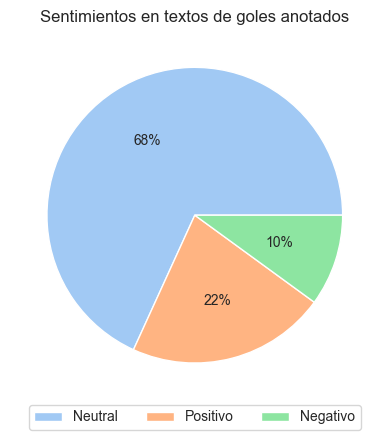

In [61]:
sns.set_palette("pastel")
sns.set_style('whitegrid')
plt.pie(list(sent_goles['sentimiento'].value_counts()), autopct='%.0f%%')
plt.title('Sentimientos en textos de goles anotados')
plt.legend(['Neutral', 'Positivo', 'Negativo'], loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=3)
plt.show()


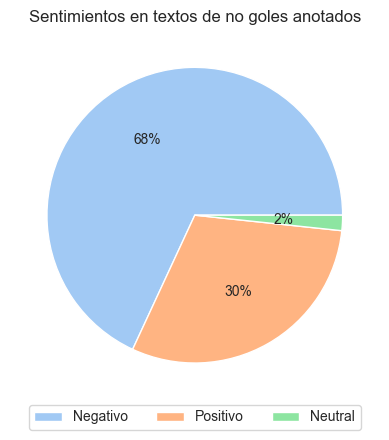

In [62]:
plt.pie(list(sent_no_goles['sentimiento'].value_counts()), autopct='%.0f%%')
plt.title('Sentimientos en textos de no goles anotados')
plt.legend(['Negativo', 'Positivo', 'Neutral'], loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=3)
plt.show()

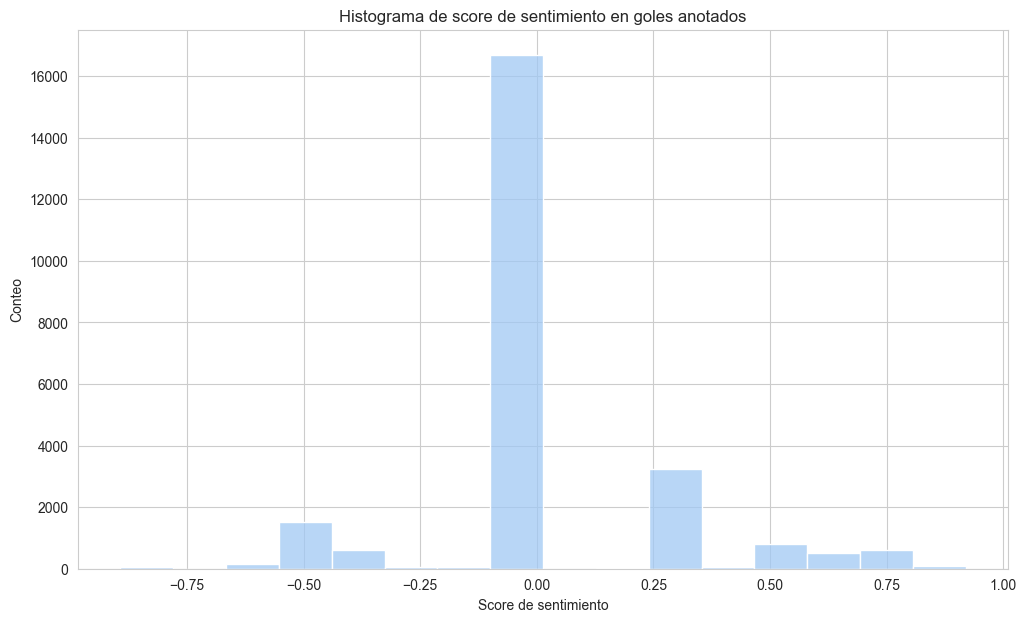

In [63]:
plt.figure(figsize=(12,7))
sns.histplot(data = sent_goles, x = 'sentiment_score')
plt.title('Histograma de score de sentimiento en goles anotados')
plt.xlabel('Score de sentimiento')
plt.ylabel('Conteo')
plt.show()

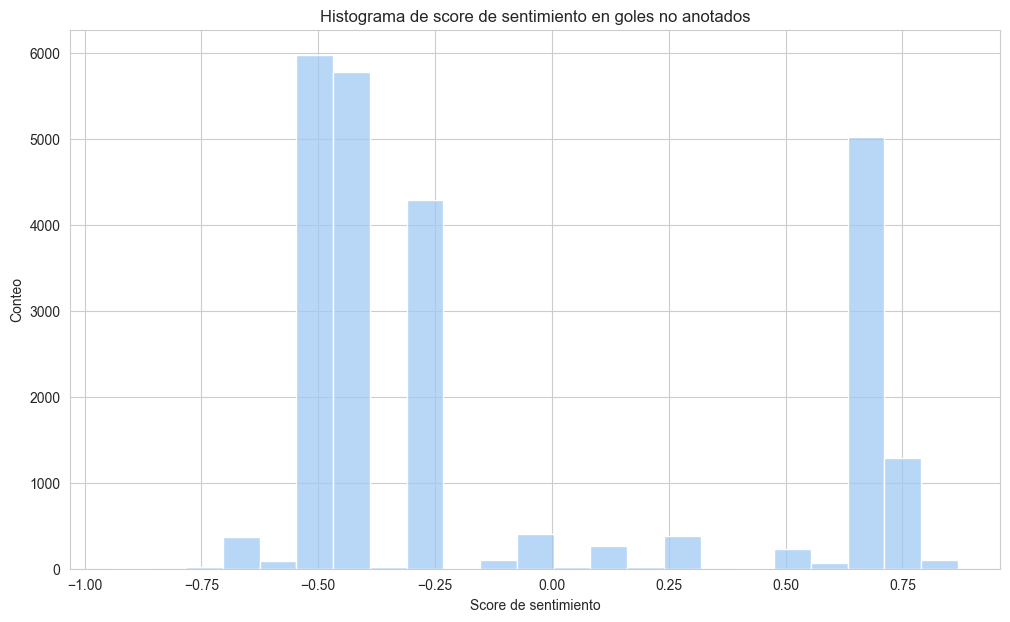

In [64]:
plt.figure(figsize=(12,7))
sns.histplot(data = sent_no_goles, x = 'sentiment_score')
plt.title('Histograma de score de sentimiento en goles no anotados')
plt.xlabel('Score de sentimiento')
plt.ylabel('Conteo')
plt.show()

In [65]:
sent_goles['equipo'] = list(intentos_goles['event_team'])
sent_goles

,text,sentiment_score,sentimiento,equipo
0,"goal ! borussia dortmund 1 , hamburg 0. kevin ...",0.0000,Neutral,Borussia Dortmund
1,"goal ! borussia dortmund 2 , hamburg 0. mario ...",0.0000,Neutral,Borussia Dortmund
2,"goal ! borussia dortmund 3 , hamburg 0. kevin ...",0.0000,Neutral,Borussia Dortmund
3,"goal ! borussia dortmund 3 , hamburg 1. robert...",0.0000,Neutral,Hamburg SV
4,"goal ! fc augsburg 0 , sc freiburg 1. papiss d...",0.0000,Neutral,SC Freiburg
...,...,...,...,...
24436,"goal ! monaco 1 , lorient 0. boschilia ( monac...",0.0000,Neutral,AS Monaco
24437,"goal ! monaco 2 , lorient 0. boschilia ( monac...",0.0000,Neutral,AS Monaco
24438,"goal ! monaco 3 , lorient 0. valere germain ( ...",0.0000,Neutral,AS Monaco
24439,"goal ! monaco 4 , lorient 0. valere germain ( ...",0.0000,Neutral,AS Monaco


In [67]:
equipos = list(set(list(intentos_goles['event_team'])))
promedio_equipo = []

for equipo in equipos:
    temp_df = sent_goles[sent_goles['equipo'] == equipo]
    promedio_temp = temp_df['sentiment_score'].mean()
    promedio_equipo.append(promedio_temp)

scores_equipos = pd.DataFrame(equipos, columns=['Equipo'])
scores_equipos['score'] = promedio_equipo
    

In [76]:
scores_equipos = scores_equipos.sort_values('score', ascending=False).reset_index()


In [80]:
equipos_positivos = scores_equipos[:10]
equipos_negativos = scores_equipos[-10:]

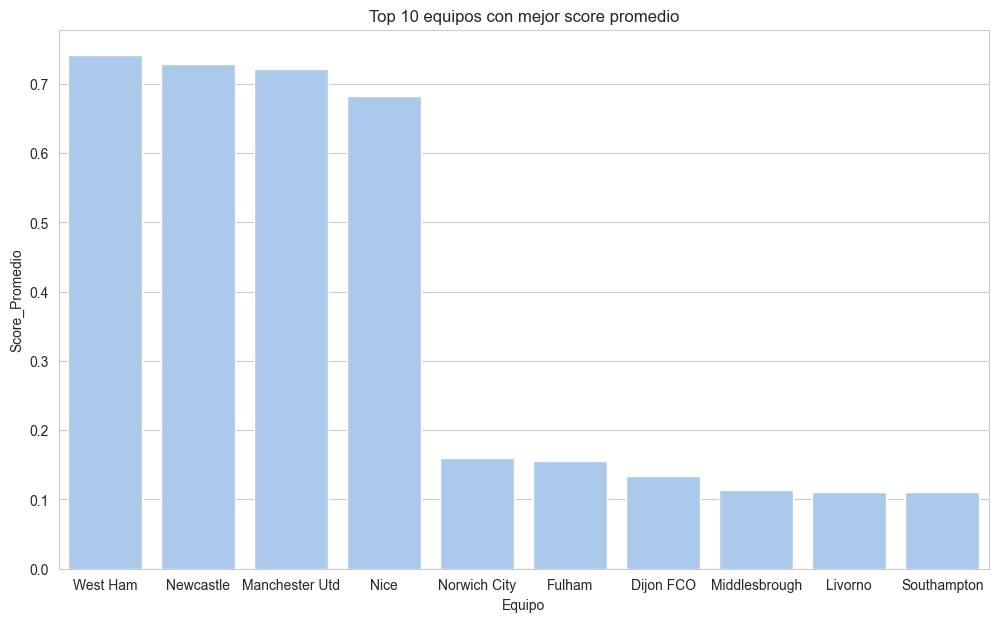

In [82]:
plt.figure(figsize=(12,7))
sns.barplot(data = equipos_positivos, x = 'Equipo', y = 'score')
plt.title('Top 10 equipos con mejor score promedio')
plt.xlabel('Equipo')
plt.ylabel('Score_Promedio')
plt.show()

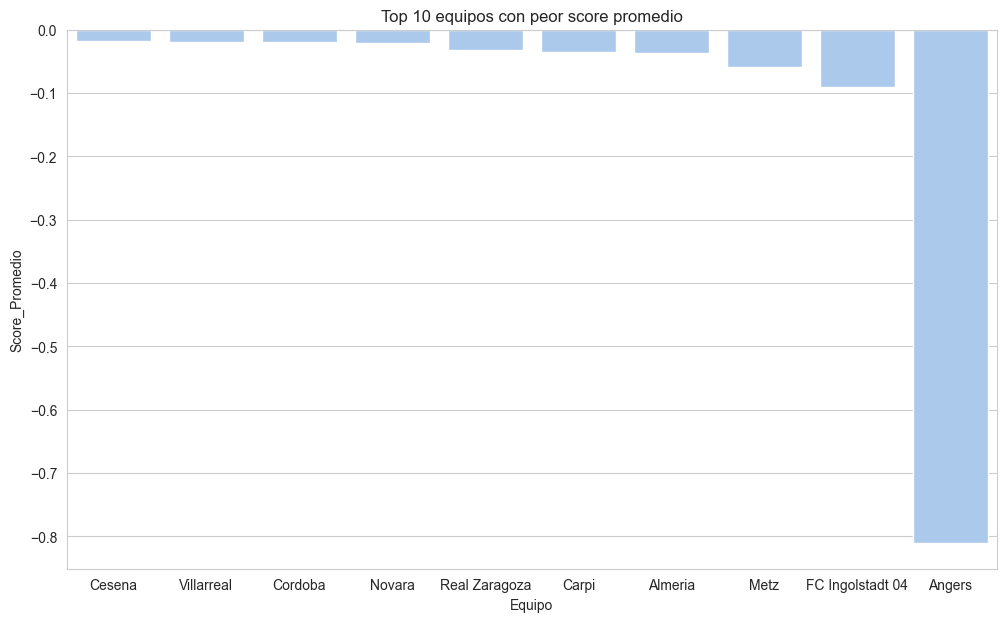

In [83]:
plt.figure(figsize=(12,7))
sns.barplot(data = equipos_negativos, x = 'Equipo', y = 'score')
plt.title('Top 10 equipos con peor score promedio')
plt.xlabel('Equipo')
plt.ylabel('Score_Promedio')
plt.show()

In [79]:
scores_equipos[-10:]

,index,Equipo,score
132,133,Cesena,-0.017070
133,25,Villarreal,-0.019377
134,45,Cordoba,-0.019917
135,41,Novara,-0.021577
136,78,Real Zaragoza,-0.031470
137,126,Carpi,-0.035871
138,127,Almeria,-0.036092
139,72,Metz,-0.058355
140,124,FC Ingolstadt 04,-0.090351
141,40,Angers,-0.810385


In [77]:
scores_equipos

,index,Equipo,score
0,102,West Ham,0.741308
1,67,Newcastle,0.729111
2,108,Manchester Utd,0.721822
3,50,Nice,0.682032
4,138,Norwich City,0.159914
...,...,...,...
137,126,Carpi,-0.035871
138,127,Almeria,-0.036092
139,72,Metz,-0.058355
140,124,FC Ingolstadt 04,-0.090351


In [70]:
scores_equipos

,Equipo,score
0,Crystal Palace,0.075504
1,Aston Villa,0.076343
2,Leicester City,0.039971
3,AS Monaco,0.018991
4,GFC Ajaccio,0.034281
...,...,...
137,Sassuolo,-0.007374
138,Norwich City,0.159914
139,Lens,-0.011184
140,SC Paderborn,0.028810


In [66]:
sent_goles['sentiment_score'].mean()

0.041944290331819484

In [52]:
equipos

['Crystal Palace',
 'Aston Villa',
 'Leicester City',
 'AS Monaco',
 'GFC Ajaccio',
 'St Etienne',
 'Swansea',
 'Eintracht Frankfurt',
 'Sunderland',
 'Deportivo La Coruna',
 'Dijon FCO',
 'Troyes',
 'Caen',
 'Stade Rennes',
 'Lazio',
 'VfB Stuttgart',
 'Catania',
 'Real Madrid',
 'RB Leipzig',
 'Parma',
 'Torino',
 'Mainz',
 'Rayo Vallecano',
 'Hertha Berlin',
 'Valencia',
 'Villarreal',
 'Manchester City',
 'Stoke City',
 'Toulouse',
 'Watford',
 'US Pescara',
 'Hannover 96',
 'TSV Eintracht Braunschweig',
 'AS Roma',
 'Liverpool',
 'Osasuna',
 'Frosinone',
 'Borussia Dortmund',
 'Livorno',
 'Bayern Munich',
 'Angers',
 'Novara',
 'Burnley',
 'Celta Vigo',
 'Bologna',
 'Cordoba',
 'Espanyol',
 'Crotone',
 'Arsenal',
 'Nurnberg',
 'Nice',
 'QPR',
 'Middlesbrough',
 'Bastia',
 'Fortuna Dusseldorf',
 'Elche',
 'FC Augsburg',
 'Everton',
 'Mallorca',
 'Real Valladolid',
 'Barcelona',
 'Levante',
 'Cardiff',
 'SC Freiburg',
 'Werder Bremen',
 'Kaiserslautern',
 'Lille',
 'Newcastle',
 'We

In [34]:
sent_no_goles['sentimiento'].value_counts()

sentimiento
Negativo    16643
Positivo     7389
Neutral       409
Name: count, dtype: int64

In [35]:
list(sent_no_goles['sentimiento'].value_counts())

[16643, 7389, 409]